In [5]:
#!conda install geopandas
#!conda install -c conda-forge missingno
#!conda install --channel conda-forge pysal

In [6]:
import mapclassify

In [9]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point


import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection


Initialize country DataFrame

In [10]:
country = geopandas.read_file('gz_2010_us_040_00_5m.json')
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [11]:
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


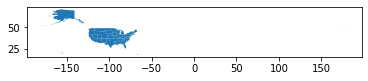

In [12]:
country.plot()

Initialize a DataFrame for Hurricane Florence

In [13]:
hurricane_list = pd.read_excel('Hurriane_data_large.xlsx')


In [14]:
hurricane_list

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,Received,Forecaster
0,1,1902-06-12 12:00:00,17.7,-84.0,35,0,0 at 0mph,Tropical Depression,Unnamed,1902-06-12 12:00:00,Unknown
1,2,1902-06-12 18:00:00,19.1,-83.6,35,0,15 at 16mph,Tropical Depression,Unnamed,1902-06-12 18:00:00,Unknown
2,3,1902-06-13 00:00:00,20.7,-83.3,40,0,10 at 18mph,Tropical Storm,Unnamed,1902-06-13 00:00:00,Unknown
3,4,1902-06-13 06:00:00,22.2,-83.1,45,0,5 at 17mph,Tropical Storm,Unnamed,1902-06-13 06:00:00,Unknown
4,5,1902-06-13 12:00:00,23.8,-83.0,50,0,5 at 18mph,Tropical Storm,Unnamed,1902-06-13 12:00:00,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
34410,26,2006-01-05 22:00:00,23.0,-48.2,40,1007,NORTHWEST NEAR 8 MPH,Tropical Storm,Zeta,2006-01-05 15:20:11,STEWART
34411,27,2006-01-06 04:00:00,23.2,-48.7,40,1007,NORTHWEST NEAR 7 MPH,Tropical Storm,Zeta,2006-01-05 21:46:11,PASCH
34412,28,2006-01-06 10:00:00,23.3,-49.3,40,1007,WEST-NORTHWEST NEAR 7 MPH,Tropical Storm,Zeta,2006-01-06 03:34:11,BEVEN
34413,29,2006-01-06 16:00:00,23.0,-49.9,35,1009,WEST NEAR 9 MPH,Tropical Depression,Zeta,2006-01-06 09:17:11,STEWART


In [15]:
country = geopandas.read_file('gz_2010_us_040_00_5m.json')
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


Sample of hurricane florence

Make a new Huricane List that is scrubbed of all Storms that are Unnamed, Storms that are called Daw were removed since the time format was off

In [16]:
hurricane_list_clean = hurricane_list
for row in hurricane_list_clean.itertuples():
    if row.Name == "Unnamed":
            #print(row.Index)
        hurricane_list_clean = hurricane_list_clean.drop(row.Index)
        

#Had to drop Daw because the time date for the storm is off
#time data 1972-09-00 00:00:00 doesn't match format specified
for row in hurricane_list_clean.itertuples():
    if row.Name == "Daw":
            #print(row.Index)
        hurricane_list_clean = hurricane_list_clean.drop(row.Index)
    
    #return df
hurricane_list_clean.reset_index(drop=True, inplace=True)

In [19]:
#plots two hurricane events
def makeChart(df1, df2, name1, name2):
    fig, ax = plt.subplots(1, figsize=(20,20))
    base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
    df1.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label=name1)
    _ = ax.axis('off')
    df2.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='Oranges', label=name2)
    _ = ax.axis('off')
    plt.legend()
    ax.set_title("Hurricanes in US Map", fontsize=25)
    plt.savefig('Hurricane_footage.png',bbox_inches='tight');
    

In [20]:
#plots one hurricane
def makeChartSingle(df1,name1):
    name = ("Hurricane ")
    name = name + name1
    fig, ax = plt.subplots(1, figsize=(20,20))
    base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
    df1.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)",
    scheme="Quantiles", legend=True)
    _ = ax.axis('off')
    #plt.legend()
    ax.set_title(name, fontsize=25)
    plt.savefig('Hurricane_footage.png',bbox_inches='tight');
    

In [21]:
#Makes a GeoPandas GeoDataFrame 
#returns dataframe based on the year and name of hurricane event
def makeFrame(df,name,year):
    storm = pd.DataFrame()
    for row in df.itertuples():
        if row.Name == name and row.Date.year == year:
        
            temp = hurricane_list_clean.loc[row.Index]
            temp = pd.DataFrame([temp])
            storm = pd.concat([temp,storm])
    storm.reset_index(drop=True, inplace=True)
    storm.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis = 1)
    storm['coordinates'] = storm[['Long', 'Lat']].values.tolist()
    storm['coordinates'] = storm['coordinates'].apply(Point)
    storm.reset_index(drop=True, inplace=True)
    storm = geopandas.GeoDataFrame(storm, geometry='coordinates')
    


    return storm
    
    


In [22]:
#prints out a list of Hurricane events in a given year
def makeYear(df,year):
    storm = pd.DataFrame()
    for row in df.itertuples():
        if row.Date.year == year:
        
            temp = hurricane_list_clean.loc[row.Index]
            temp = pd.DataFrame([temp])
            storm = pd.concat([temp,storm])
    listyear = storm.Name.unique().tolist()
    print("Storms in",year,":")
    print('\n'.join(map(str, listyear))) 
    print('\n')




In [23]:
#To compare two storms
def start(df):
    print('1st Storm:')
    print('Enter year (1950-2018)')
    year = int(input())
    makeYear(df,year)
    name1 = input("Enter name:")
    df1 = makeFrame(df, name1, year)
    print('2nd Storm:')
    print('Enter year (1970-2020)')
    year = int(input())
    makeYear(df,year)
    name2 = input("Enter name:")  
    df2 = makeFrame(df,name2, year)
    makeChart(df1,df2,name1,name2)

In [24]:
#To plot only one storm
def start1(df):
    print('Enter year (1950-2018)')
    year = int(input())
    makeYear(df,year)
    name = input("Enter name:")
    df1 = makeFrame(df, name, year)
    makeChartSingle(df1,name)


1st Storm:
Enter year (1950-2018)
1980
Storms in 1980 :
Karl
Jeanne
Ivan
Hermine
Georges
Frances
Earl
Danielle
Charley
Bonnie
Alle


Enter name:Alle
2nd Storm:
Enter year (1970-2020)
2005
Storms in 2005 :
Zeta
Epsilon
Delta
Gamma
Twenty-seven
Beta
Twenty-six
Alpha
Twenty-five
Wilma
Twenty-four
Vince
Twenty-two
Tammy
Stan
Twenty
Nineteen
Rita
Eighteen
Philippe
Seventeen
Ophelia
Sixteen
Nate
Fifteen
Maria
Fourteen
Lee
Thirteen
Katrina
Twelve
Jose
Eleven
Ten
Irene
Nine
Harvey
Eight
Gert
Seven
Franklin
Six
Emily
Five
Dennis
Four
Cindy
Three
Bret
Two
Arlene
One


Enter name:Katrina


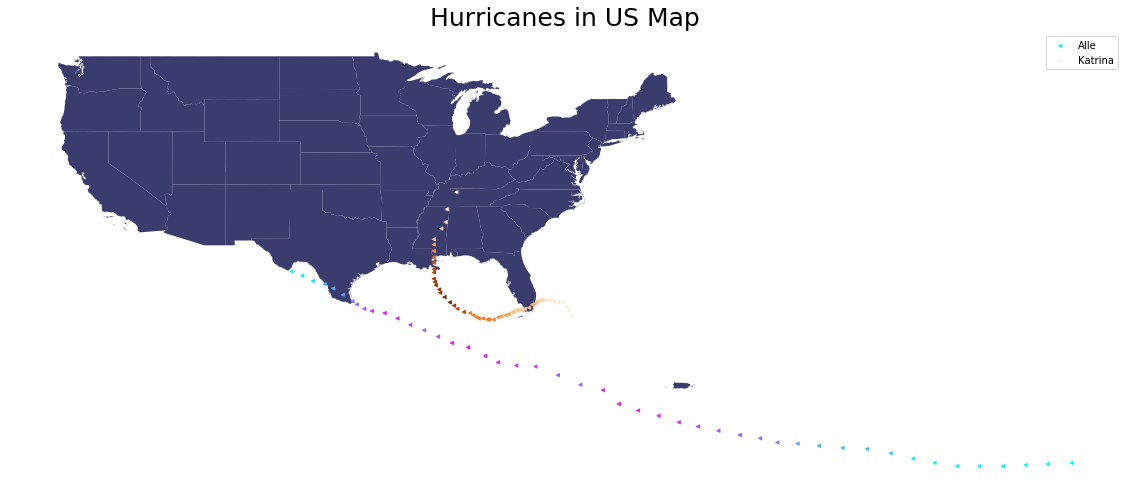

In [182]:

#Program
#Maps two storm events
start(hurricane_list_clean)

Enter year (1950-2018)
1980
Storms in 1980 :
Karl
Jeanne
Ivan
Hermine
Georges
Frances
Earl
Danielle
Charley
Bonnie
Alle


Enter name:Karl


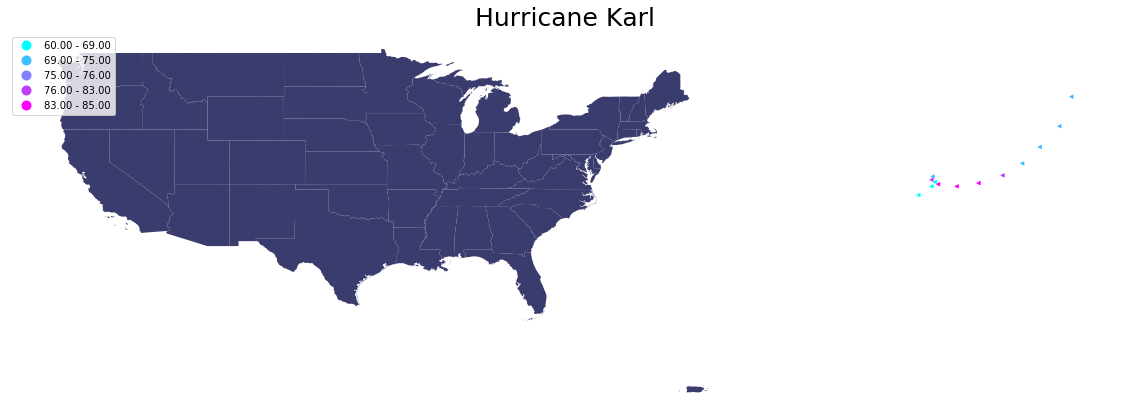

In [27]:
#Program
#Maps one storm event
start1(hurricane_list_clean)

In [25]:
#DataFrame for Hurricane Harvey and Katrina are generated
harvey = makeFrame(hurricane_list_clean,'Harvey',2017)
katrina = makeFrame(hurricane_list_clean,'Katrina',2005)

/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


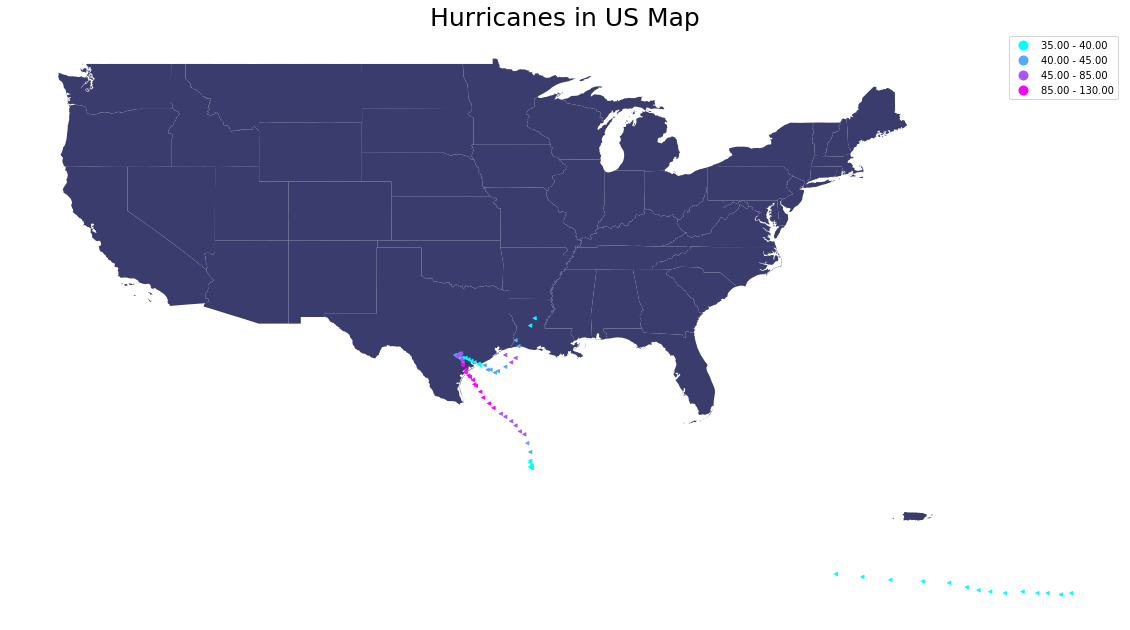

In [28]:
#plot of Hurricane Harvey
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
harvey.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)",
        scheme="Quantiles", legend=True)
_ = ax.axis('off')
#plt.legend()
ax.set_title("Hurricanes in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');

In [36]:
#Get average wind per year
timeR = hurricane_list_clean[['Date', 'Wind']]
aveWind = timeR.groupby(temp).mean()

#get average perssure per year
timeP = hurricane_list_clean[['Date', 'Pres']]
avePres = timeP.groupby(temp).mean()

In [37]:
aveWind

,Wind
Date,
1950,80.449309
1951,71.803797
1952,69.597156
1953,66.174089
1954,72.621145
...,...
2014,69.097744
2015,58.081761
2016,65.664336


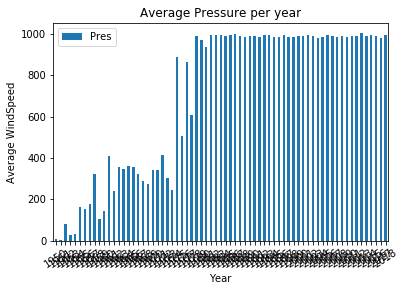

In [39]:
plot_hours = avePres.plot(kind='bar')
plot_hours.set_title("Average Pressure per year")
plt.ylabel("Average WindSpeed")
plt.xlabel("Year")
plt.xticks(rotation = 33)


#plt.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
plt.show()



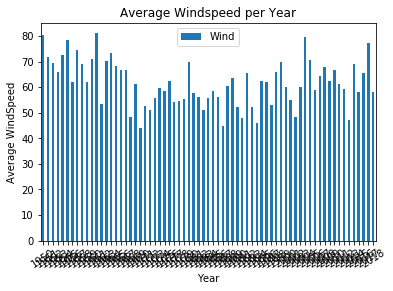

In [40]:
plot_hours = aveWind.plot(kind='bar')
plot_hours.set_title("Average Windspeed per Year")
plt.ylabel("Average WindSpeed")
plt.xlabel("Year")
plt.xticks(rotation = 33)

#plt.xticks(np.arange(min(x), max(x)+1, 1.0))

#plt.xticks(69,labels, rotation='vertical')
plt.show()



In [41]:
avePres

,Wind
Date,
1950,80.449309
1951,71.803797
1952,69.597156
1953,66.174089
1954,72.621145
...,...
2014,69.097744
2015,58.081761
2016,65.664336


In [42]:
aveWind

,Pres
Date,
1950,6.663594
1951,3.050633
1952,79.682464
1953,27.753036
1954,30.202643
...,...
2014,987.954887
2015,994.367925
2016,990.400350
